In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

def add_days_after_planting(df, day_of_planting='2022-11-11'):
    day_of_planting = pd.to_datetime(day_of_planting)
    df['days_after_planting'] = (pd.to_datetime(df['date']) - day_of_planting).dt.days
    return df

In [2]:
column_names = [
    'Year', 'Day of Year (DOY)', 'Station Number', 'Air Temp - Max', 'Air Temp - Min',
    'Air Temp - Mean', 'RH - Max', 'RH - Min', 'RH - Mean',
    'VPD - Mean', 'Solar Rad. - Total', 'Precipitation - Total',
    '4" Soil Temp - Max  ( = 2" prior to 1999 )',
    '4" Soil Temp - Min  ( = 2" prior to 1999 )',
    '4" Soil Temp - Mean ( = 2" prior to 1999 )',
    '20" Soil Temp - Max  ( = 4" prior to 1999 )',
    '20" Soil Temp - Min  ( = 4" prior to 1999 )',
    '20" Soil Temp - Mean ( = 4" prior to 1999 )',
    'Wind Speed - Mean', 'Wind Vector Magnitude for Day', 
    'Wind Vector Direction for Day', 'Wind Direction Standard Deviation for Day',
    'Max Wind Speed', 'Heat Units (30/12.8 C) (86/55 F)',
    'Reference Evapotranspiration (ETo) - Original AZMET',
    'Reference Evapotranspiration (ETos) - Penman-Monteith',
    'Actual Vapor Pressure - Daily Mean', 
    'Dewpoint, Daily Mean'
]

In [3]:
df = pd.concat([pd.read_csv(csv, names=column_names) for csv in glob.glob('azmet/daily/*.txt')])

In [4]:
df['date'] = pd.to_datetime(df['Year'] * 1000 + df['Day of Year (DOY)'], format='%Y%j')

In [5]:
s10 = df[(df['date'] >= '2019-11-13') & (df['date'] <= '2020-03-03')]
s10['season'] = 'Season 10'

s13 = df[(df['date'] >= '2021-12-02') & (df['date'] <= '2022-03-14')]
s13['season'] = 'Season 13'

s15 = df[(df['date'] >= '2022-11-15') & (df['date'] <= '2023-03-08')]
s15['season'] = 'Season 15'

/tmp/ipykernel_11588/3329227057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s10['season'] = 'Season 10'
/tmp/ipykernel_11588/3329227057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s13['season'] = 'Season 13'
/tmp/ipykernel_11588/3329227057.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [6]:
# Add days after planting
s10 = add_days_after_planting(df=s10, day_of_planting='2019-11-13')
s13 = add_days_after_planting(df=s13, day_of_planting='2021-12-02')
s15 = add_days_after_planting(df=s15, day_of_planting='2022-11-15')
df = pd.concat([s10, s13, s15])

/tmp/ipykernel_11588/3415488231.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_after_planting'] = (pd.to_datetime(df['date']) - day_of_planting).dt.days
/tmp/ipykernel_11588/3415488231.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_after_planting'] = (pd.to_datetime(df['date']) - day_of_planting).dt.days
/tmp/ipykernel_11588/3415488231.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

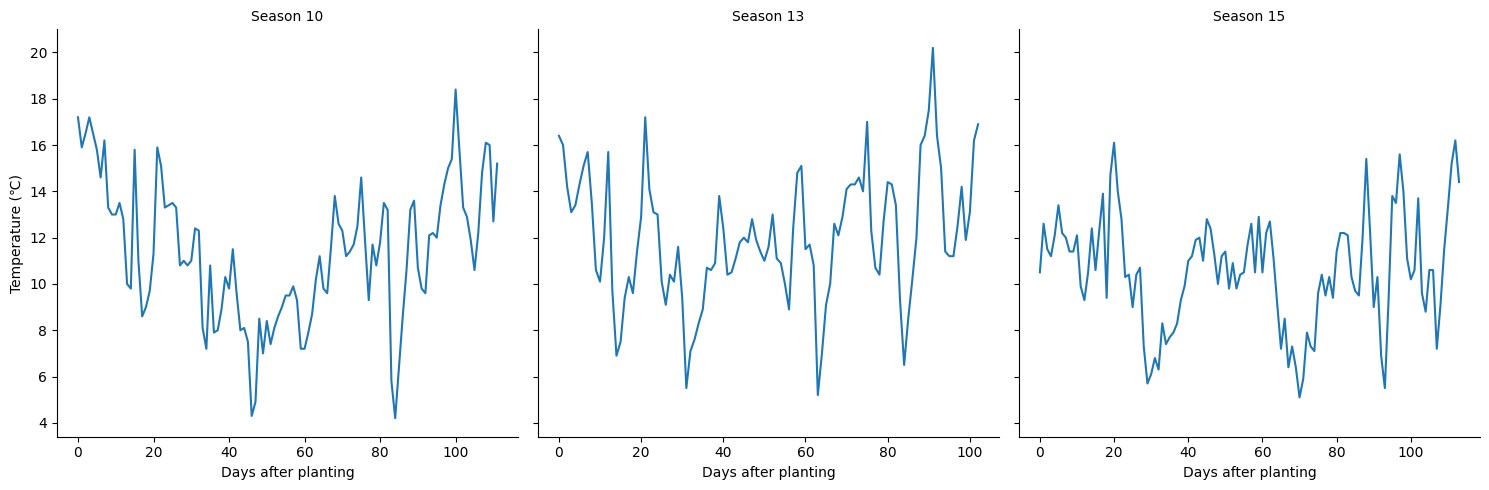

In [7]:
g = sns.relplot(
    x='days_after_planting',
    y='Air Temp - Mean',
    col='season',
    data=df,
    kind='line',
    # hue='season',
    facet_kws={'sharex': False}
)

g.set_axis_labels("Days after planting", "Temperature (℃)")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

# # Add vertical line and label
# for ax in g.axes.flat:
#     ax.axvline(x=0, color='red', linestyle='--')
#     ax.text(0.05, ax.get_ylim()[1]/2, 'Day of planting', color='red', ha='left', va='center', rotation=90, transform=ax.get_yaxis_transform())
    
plt.savefig('figures/azmet_temp.png', dpi=900, bbox_inches='tight', facecolor='white', edgecolor='white')
plt.show()

In [8]:
df = df[['date', 'season', 'days_after_planting', 'Air Temp - Max', 'Air Temp - Min', 'Air Temp - Mean']]
df = df.set_index(['date', 'season', 'days_after_planting'])
df = df.melt(ignore_index=False).reset_index()

In [9]:
df['variable'] = df['variable'].str.replace('Air Temp - ', '').str.strip()

In [10]:
sns.set_context('talk', font_scale=0.9, rc={"lines.linewidth": 1.6}) #paper, notebook, talk, poster
#'poster', font_scale=0.5

# Get the 'Paired' color palette
# palette = sns.color_palette("colorbind")
# sns.set_palette(palette=palette)

# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

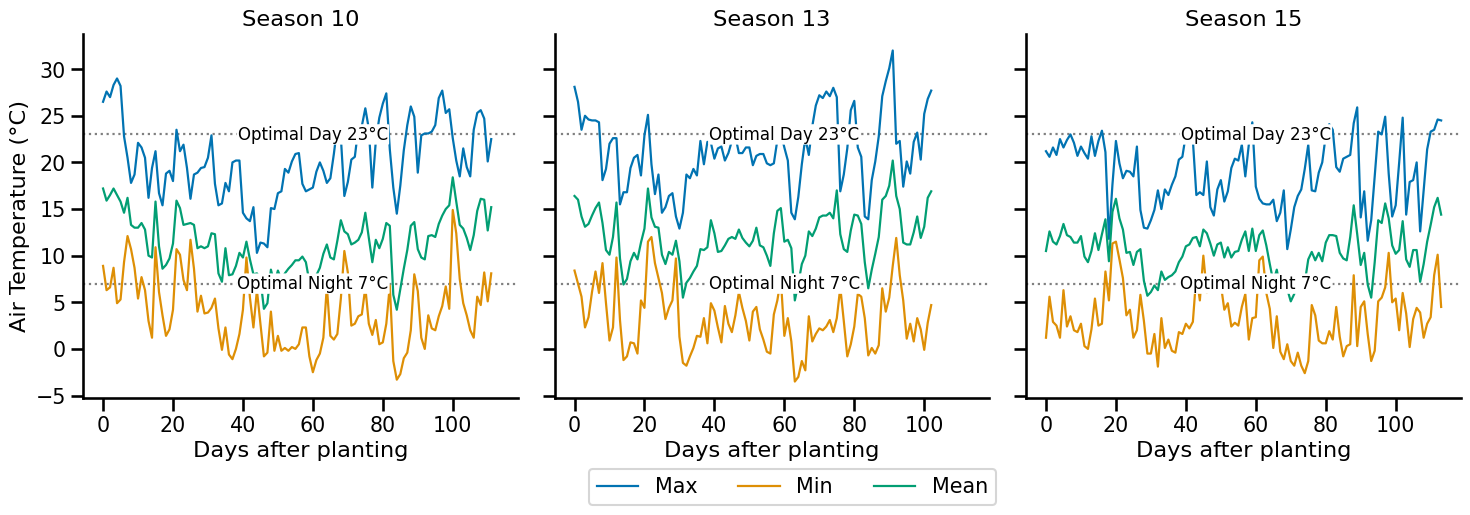

In [11]:
g = sns.relplot(
    x='days_after_planting',
    y='value',
    hue='variable',
    col='season',
    kind='line',
    data=df,
    palette='colorblind'
)

# Add vertical lines at y=23 and y=7 in each subplot
for ax in g.axes.flat:
    ax.axhline(23, color='grey', linestyle=':', zorder=1)
    ax.text(60, 23, 'Optimal Day 23°C', color='black', va='center', ha='center', zorder=2, fontsize=12, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.01'))
    ax.axhline(7, color='grey', linestyle=':', zorder=1)
    ax.text(60, 7, 'Optimal Night 7°C', color='black', va='center', ha='center', zorder=2, fontsize=12, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.01'))

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

# Set the y-axis label
g.set(ylabel='Air Temperature (°C)', xlabel='Days after planting')

# Move legend to bottom center
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, -0.06), ncol=6, title=None, frameon=True)

plt.savefig('figures/azmet_temp.png', dpi=900, bbox_inches='tight', facecolor='white', edgecolor='white')
plt.show()